<br>
# Einblick in die Arbeit mit <i>zufall</i> 

von Holger Böttcher - hbomat@posteo.de
<br><br>
Diese Arbeit steht unter der freien Lizenz [CC BY-SA 4.0](https://creativecommons.org/licenses/by-sa/4.0/deed.de)  
<br><br>
1.<b> Urne</b> - Zufallsexperiment<br>
2.<b> Binomialverteilung</b><br>
3.<b> Bedingte Wahrscheinlichkeiten</b><br>
4.<b> Statistische</b> Berechnungen<br>
5.<b></b> Ein <b>Spiel</b><br><br>
6.<b> Klassen </b> in <i>zufall</i><br>
7.<b> Hilfe</b>-Informationen
<br><br><br>
Das Paket <i>zufall</i> ist in der Programmiersprache <b>Python</b> geschrieben und basiert
<br>auf dem ebenfalls in Python geschriebenen und quelloffen frei verfügbaren <b>CAS 
<br>SymPy</b> 

Für die Objekte der Stochastik wurden Python-Klassen im Sinne der Objekt-
<br>Orientierten-Programmierung implementiert (siehe die Liste unter 6.). Damit können 
<br>entsprechende Python-Objekte erzeugt werden, mit denen unter Verwendung ihrer 
<br>Eigenschaften und Methoden am Computer gearbeitet wird 

Die Berechnungen werden in einem Jupyter-Notebook (mit englischer Bedienoberfläche)
<br>durchgeführt, die vorliegende Datei wurde durch den HTML-Export eines solchen 
<br>Notebooks erzeugt
<br><br>
<div style='color:yellowgreen'>
<i>Die Kommentare (nach #) sind lediglich Erläuterungen und für die Berechnungen</i> 
<br><i>nicht relevant</i>
</div>
<br>

In [1]:
%run zufall/start   # Aktivierung des Paketes

<br>
## 1. Urne - Zufallsexperiment

Aus einer Urne mit 5 grünen, 3 roten und 2 weißen Kugeln wird 2-mal mit 
<br>Zurücklegen / Wiederholung gezogen

In [2]:
u = Urne({g:5, r:3, w:2}, 2)
u   

Urne(Stufen=2, mit Wiederholung , mit Anordnung)

Ergebnismenge und Wahrscheinlichkeitsverteilung

In [3]:
u.omega

set([gg, gr, gw, rg, rr, rw, wg, wr, ww])

In [4]:
u.vert

{gg: 1/4, gr: 3/20, gw: 1/10, rg: 3/20, rr: 9/100, rw: 3/50, wg: 1/10, wr: 3/5
0, ww: 1/25}

In [5]:
u.Vert(d=4)   # Dezimaldarstellung

{gg: 0.25, gr: 0.15, gw: 0.1, rg: 0.15, rr: 0.09, rw: 0.06, wg: 0.1, wr: 0.06,
 ww: 0.04}

Das Baumdiagramm kann gezeichnet werden, falls es nicht zu groß wird

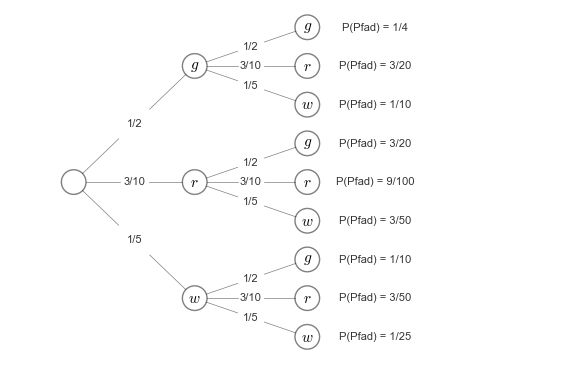

In [6]:
u.baum

Die Wahrscheinlichkeiten von Ereignissen sind leicht zu berechnen

In [7]:
u.P('rg')

3/20

In [8]:
u.P(['rg', 'rr', 'rw'])

3/10

Es sind Stichproben mit beliebiger Länge moglich

In [9]:
u.stich_probe(5)

[gr, rg, rg, gg, gw]

Mit Hilfe der Listendarstellung der Versuchsausgänge in einer Stichprobe

In [10]:
u.stich_probe(5, l=ja)

[[r, g], [g, g], [g, w], [w, w], [w, g]]

können Zähl-Statistiken erhalten werden:

In [11]:
n = 100000
sp = u.stich_probe(n, l=ja)

In [12]:
anzahl(sp, [r, g]) / n    # rel. Häufigkeit; anzahl - zufall-Funktion

0.14921

In [13]:
 u.P('rg', d=4)           # theoretische Wahrscheinlichkeit

0.15

Es sind auch eigene Python-Funktionen zu benutzen, z.B berechnet die folgende
<br>Funktion die relative Häufigkeit aller Versuchsausgänge, die mindestens ein <i>w</i> 
<br>enthalten 

In [14]:
def eig_fkt(liste):    # die Funktion erwartet eine Liste als Argument
    anz = 0
    for el in liste:
        if w in el:
            anz += 1
    return anz / len(liste)    # len gibt die Länge der Liste zurück          

In [15]:
eig_fkt(sp)   

0.36459

Die theoretische Wahrscheinlichkeit ist in diesem Fall

In [16]:
u.P(['ww', 'wr', 'wg', 'rw', 'gw'], d=4)

0.36

Die vorige Aufgabe läßt sich aus Python-Sicht eleganter und effektiver mit Hilfe
<br>einer <i>list comprehension</i> lösen

In [17]:
li = [ x for x in sp if w in x ]

len(li) / len(sp)   

0.36459

<br>
## 2. Binomialverteilung
<br>

In [18]:
bv = BV(12, 0.4)   # BV - BinomialVerteilung
bv

BinomialVerteilung(12,2/5)

Erwartungswert, Varianz und Standardabweichung

In [19]:
bv.erw, bv.var, bv.sigma

⎛      72  6⋅√2⎞
⎜24/5, ──, ────⎟
⎝      25   5  ⎠

In [20]:
bv.Erw(d=2), bv.Var(d=2), bv.Sigma(d=2)

(4.8, 2.88, 1.7)

Die Wahrscheinlichkeitsverteilung

In [21]:
bv.vert 

⎧     531441       4251528       15588936     6928416      10392624      55427
⎨0: ─────────, 1: ─────────, 2: ─────────, 3: ────────, 4: ────────, 5: ──────
⎩   244140625     244140625     244140625     48828125     48828125     244140

328      43110144      24634368     2052864       608256         608256       
───, 6: ─────────, 7: ─────────, 8: ────────, 9: ────────, 10: ─────────, 11: 
625     244140625     244140625     48828125     48828125      244140625      

  73728           4096  ⎫
─────────, 12: ─────────⎬
244140625      244140625⎭

In [22]:
bv.Vert(d=4)   # Dezimaldarstellung

{0: 0.0022, 1: 0.0174, 2: 0.0639, 3: 0.1419, 4: 0.2128, 5: 0.227, 6: 0.1766, 7
: 0.1009, 8: 0.042, 9: 0.0125, 10: 0.0025, 11: 0.0003, 12: 0.0}

In [23]:
bv.Vert(p=ja)   # Prozentwerte

{0: 0.22, 1: 1.74, 2: 6.39, 3: 14.19, 4: 21.28, 5: 22.7, 6: 17.66, 7: 10.09, 8
: 4.2, 9: 1.25, 10: 0.25, 11: 0.03, 12: 0.0}

Das Histogramm und das Histogramm der kumulierten Wahrscheinlichkeiten

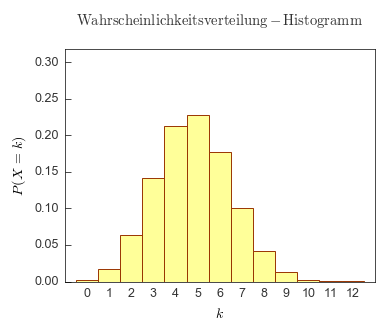

In [24]:
bv.hist

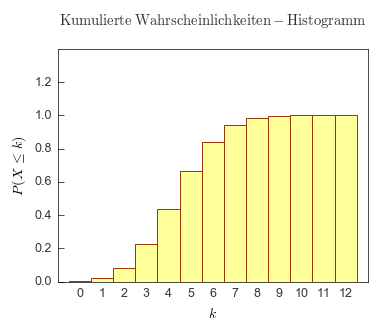

In [25]:
bv.hist_kum

Wahrscheinlichkeiten können so

In [26]:
bv.P(5)  # Auftreten einer 5   

 55427328
─────────
244140625

In [27]:
bv.P([2, 4, 6], d=4)   # Auftreten einer 2, 4 oder 6

0.4533

 oder auch mit einer Notation, die der üblichen sehr nahe kommt, berechnet werden

In [28]:
bv.P(X=5)

 55427328
─────────
244140625

In [29]:
bv.P(X <= 8) 

48082653
────────
48828125

In [30]:
P = bv.P   # das ist lediglich eine temporäre Umbenennung der Methode

In [31]:
P(X <= 8)

48082653
────────
48828125

In [32]:
P(X <= 8, d=4)

0.9847

In [33]:
P('3 < X <= 6'), P('3 < X <= 6', d=4)

⎛150500592        ⎞
⎜─────────, 0.6165⎟
⎝244140625        ⎠

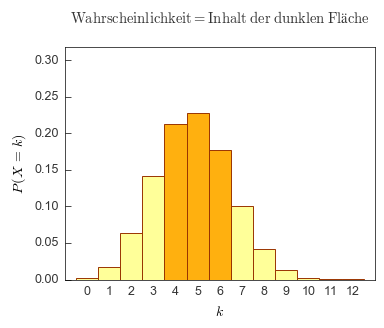

In [34]:
P('3 < X <= 6', g=ja)

Es sind Versuche und Stichproben beliebigen Umfangs möglich

In [35]:
bv.versuch

5

In [36]:
sp = bv.stich_probe(50000)   # eine liste mit 50000 Elementen
sp[:10]                      # die ersten 10 Elemente

[4, 5, 7, 6, 4, 5, 6, 6, 5, 5]

Durch die Rückgabe einer DatenReihe mit den Werten der Stichprobe

In [37]:
dr = bv.stich_probe(50000, d=1)   

Rückgabe einer DatenReihe


kann ein Vergleich der Wahrscheinlichkeiten der Binomialverteilung und der relativen 
<br> Häufigkeiten in der Stichprobe erhalten werden; das kann beliebig oft wiederholt 
<br>werden, indem die Stichprobe neu gezogen wird (durch erneutes Ausführen der obigen 
<br>Zelle, eventuell auch mit anderem Umfang) und die nachfolgenden Zellen erneut<br>berechnet werden
<br><br>
Hier der Vergleich zwischen der theoretischen Verteilung und der Stichprobe:

In [38]:
bv.Erw(d=4), dr.Mittel(d=4)

(4.8, 4.8041)

In [39]:
bv.Sigma(d=4), dr.S(d=4)   # für den zweiten Wert braucht der Computer 
                           # etwas länger

(1.6971, 1.6955)

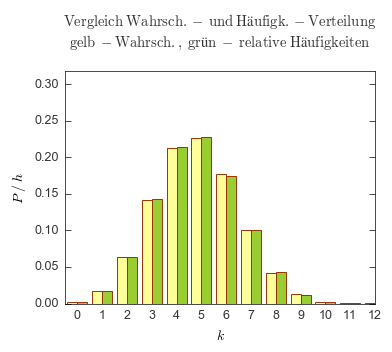

In [40]:
bv.Hist(dr)

Für ein Ereignis kann veranschaulicht werden, wie sich die relativen 
<br> Häufigkeiten stabilisieren

In [41]:
e = [5, 6, 7]   # Ereignis "5 oder 6 oder 7"

bv.P(e, d=4)


0.5045

 
Stabilisierung der relativen Häufigkeiten eines Ereignisses

Es werden die relativen Häufigkeiten eines Ereignisses bei wachsender Ver-
suchsanzahl dargestellt

grüne Linie: theoretische Wahrscheinlichkeit des Ereignisses
 


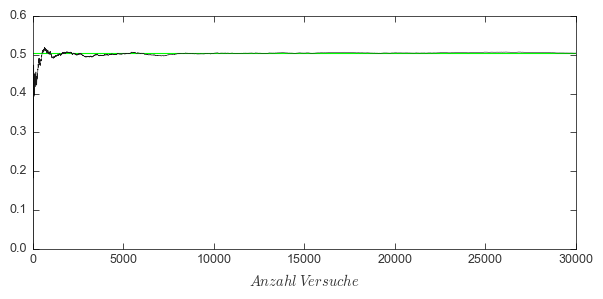

In [42]:
bv.relh2p(e, 30000)   # mehrfach ausführen, auch mit anderem e  
                      # und/oder anderem Stichprobenumfang

<br>
## 3. Bedingte Wahrscheinlichkeiten

<br>
In einer Lostrommel sind 80% der Lose Nieten, 40% der Lose sind rot gefärbt und<br>
5% sind rot gefärbt und keine Nieten

Die zugehörige Vier-Felder-Tafel ist

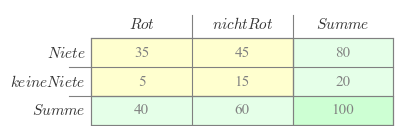

In [43]:
vt = VT([35, 45, 5, 15], ['Rot', 'nichtRot', 'Niete', 'keineNiete'])
vt.ausg

Sie kann auch nur mit den gegebenen Werten erzeugt werden

Die Tafel wird automatisch vervollständigt


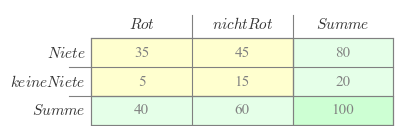

In [44]:
vt = VT([x, x, 80, 5, x, x, 40, x, 100], ['Rot', 'nichtRot', 'Niete', 'keineNiete'])
vt.ausg

Die Wahrscheinlichkeiten (einschließlich der bedingten), die sich anhand der Tafel
<br>berechnen lassen, sind folgende

<IPython.core.display.Math object>

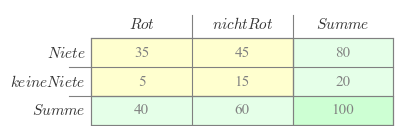

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [45]:
vt.wahrsch

Gerd Grigerenzer kommt in seinerm Buch <i>Einmaleins der Skepsis</i> zu dem Schluss, 
<br>dass für den Umgang mit bedingten Wahrscheinlichkeiten von den relativen Zahlen in 
<br>einer Vier-Felder-Tafel zu den natürlichen (absoluten) Häufigkeiten in einem 
<br>entsprechenden Baum der natürlichen Häufigkeiten übergegangen werden sollte

In [46]:
hb = vt.hb_(1000)    # Häufigkeitsbaum, welcher der Vierfeldertafel 
                     # entspricht; auf 1000 umgerechnet

Umrechnen auf 1000
bei Notwendigkeit Runden, deshalb kleine Differenzen möglich


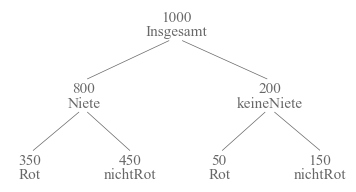

In [47]:
hb.ausg   

<IPython.core.display.Math object>

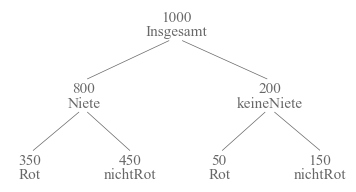

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [48]:
hb.wahrsch

## 4. Statistische Berechnungen
<br>
Eine weitere Datenreihe auf der Grundlage einer Binomialverteilung

In [49]:
bv = BV(15, 0.2)   # andere Binomialverteilung
dr1 = bv.stich_probe(30000, d=1)

Rückgabe einer DatenReihe


In [50]:
dr1.n, dr1.daten[:10]   # Umfang und die ersten 10 Werte

(30000, [1, 3, 1, 5, 3, 1, 1, 2, 4, 3])

In [51]:
dr1.hh(5, d=3)   # relative Häufigkeit für k=5

0.101

In [52]:
dr1.Mittel(d=3)   # Mittelwert

2.986

In [53]:
dr1.spann_weite   # Spannweite

11

In [54]:
dr1.modal   # Modalwert und absolute Häufigkeit

([3], 7587)

In [55]:
dr1.Modal(rd=ja)   # ebenso, relative Häufigkeit

([3], 0.2529)

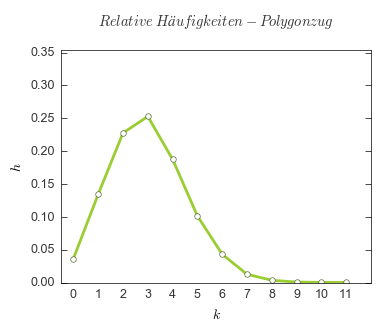

In [56]:
dr1.poly_zug

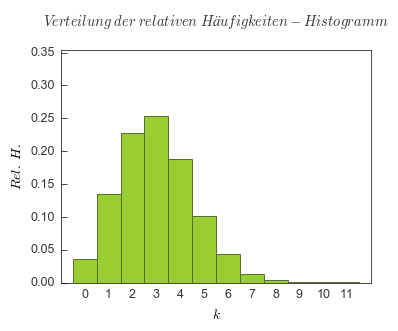

In [57]:
dr1.hist

Die Verteilung der relativen Häufigkeiten, in Prozent

In [58]:
dr1.Vert(p=ja)

{0: 3.63, 1: 13.44, 2: 22.77, 3: 25.29, 4: 18.76, 5: 10.14, 6: 4.3, 7: 1.25, 8
: 0.34, 9: 0.07, 10: 0.01, 11: 0.0}

Eine Datenreihe auf der Grundlage einer Normalverteilung

In [59]:
nv = NormalVerteilung(3, 1)   
dr2 = nv.stich_probe(50000, d=1)

Rückgabe einer DatenReihe


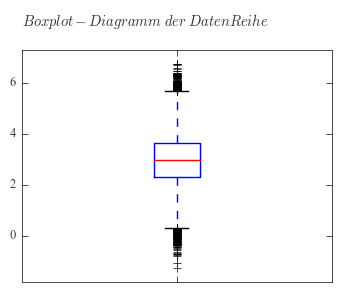

In [60]:
dr2.box_plot

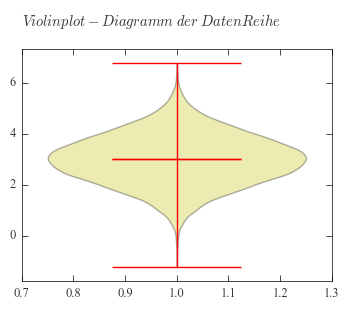

In [61]:
dr2.violin_plot

In [62]:
dr3 = dr2.klassen(12)   # Klasseneinteilung

In [63]:
dr3.daten[:20], dr3.daten[-20:]   # die ersten 20 und letzten 20 Werte
                                  # Klassennummern 0, 1, ..., 11

([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [11, 11, 11, 11
, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11])

In [64]:
dr3.vert_abs_h   # Verteilung der absoluten Häufigkeiten

{0: 9, 1: 81, 2: 532, 3: 2305, 4: 6219, 5: 11214, 6: 13085, 7: 9784, 8: 4881, 
9: 1506, 10: 344, 11: 40}

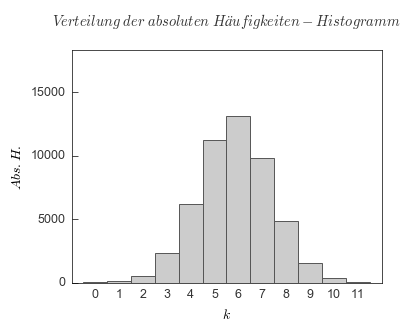

In [65]:
dr3.hist_abs_h   # entsprechendes Histogramm

<br>
## 5. Ein Spiel

In <i>zufall</i> sind einige einfache Spiele implementiert, die verwendet werden können

Hier wird demonstriert, wie das Ziegenproblem mit Hilfe eines Python-Programms 
<br>simuliert werden kann

Das Programm ist auch in einem der Aufgaben-Notebooks in den Materialien enthalten, 
<br>die von <i>zufall</i> bereitgestellt werden, gemeinsam mit einem Programm zur statistischen 
<br>Auswertung des Spiels bei vielfacher Wiederholung

Der Algorithmus geht auf *Gero von Randow* zurück
<br><br>

In [66]:
# Definition einer Funktion für das Spiel

def ziegen_problem():
    
    auto = zuf_zahl((1, 3))         # die Tür mit dem Auto    ( Zufallszahl 1, 2 oder 3 )
    spieler = zuf_zahl((1, 3))      # die vom Spieler gewählte Tür    
    frei = {1, 2, 3}.difference({auto, spieler})
                                    # eine oder zwei Türen für den Spielleiter
                                    # (er darf weder die Auto- noch die gewählte Tür öffnen)    
    if spieler != auto:
        gewinnA = 'verloren'        # Strategie A: verloren
        leiter = frei.pop()         # die Tür für den Spielleiter (frei hat ein Element)
    else:                           
        gewinnA = 'gewonnen'        # Strategie A: gewonnen
        nr = zuf_zahl((0, 1))       # zufällige Wahl eines Index  (frei hat zwei Elemente)    
        leiter = list(frei)[nr]  
        
    wechsel = 6 - spieler - leiter  # zu dieser Tür kann gewechselt werden 
                                    # (es gilt immer spieler + leiter + wechsel = 6)    
    if wechsel == auto: 
        gewinnB = 'gewonnen'        # Strategie B: gewonnen
    else:
        gewinnB = 'verloren'        # Strategie B: verloren
        
    print("\n                     Strategie A        Strategie B");
    print("Auto    " + str(auto) + ".Tür")
    print("Spieler " + str(spieler) + ".Tür")
    print("Leiter  " + str(leiter) + ".Tür")
    print("                     kein Wechsel", "      Wechsel zur " + str(wechsel) + ".Tür")
    print("                    ", gewinnA, "         ", gewinnB, "\n")   

In [67]:
# Durchführung eines Spiels; das kann beliebig oft wiederholt werden

ziegen_problem()   


                     Strategie A        Strategie B
Auto    2.Tuer
Spieler 1.Tuer
Leiter  3.Tuer
                     kein Wechsel       Wechsel zur 2.Tuer
                     verloren           gewonnen 



<br>
## 6. Klassen in <i>zufall</i>

In [68]:
Hilfe(h=6)

		
Klassen in zufall
	
Kurz-     Langname

ZE        ZufallsExperiment
             = ZV  ZufallsVersuch
ZG        ZufallsGröße
BK        BernoulliKette

BV        BinomialVerteilung		
HGV       HyperGeometrischeVerteilung		
GLV       GleichVerteilung
GV        GeometrischeVerteilung
PV        PoissonVerteilung
		
NV        NormalVerteilung
EV        ExponentialVerteilung

DR        DatenReihe

EA        EreignisAlgebra		
VT        VierFelderTafel
HB        HäufigkeitsBaum

KI        KonfidenzIntervall		
AT        AlternativTest		
STP       SignifikanzTestP
		
Urne		
Münze		
Würfel		
Rad       GlücksRad
		
MK        MarkoffKette
		
Roulette		
Chuck     ChuckALuck		
Craps		
Toto      FussballToto		
Lotto		
Skat      SkatBlatt
		
Vektor    analog zu agla		
Matrix    analog zu agla			
        


## 7. Hilfe-Informationen

<i>zufall</i> verfügt über ein eingebautes Hilfesystem

Hilfethemen können mit <i>Hilfe()</i> abgefragt werden<br> 

Hilfe zur Erzeugung von Objekten kann jederzeit erhalten werden, indem in der 
<br>Erzeugerfunktion des Objektes als letztes Argument <i>h = 1</i> angegeben wird, etwa

<i>$\qquad$Urne(..., h=1)</i><br>

Das gilt auch für alle Funktions- und Methodenaufrufe

Zu einem existierenden Objekt ist die Liste der Namen seiner 
<br>Eigenschaften und Methoden über die <i>h</i>-Eigenschaft erhältlich, etwa 

In [69]:
bv.h

 		
Eigenschaften und Methoden (M) für BinomialVerteilung
 
bv.hilfe               Bezeichner der Eigenschaften und Methoden
bv.e_sigma_umg         Sigma-Umgebungen des Erwartungswertes		
bv.erw                 Erwartungswert	
bv.erw_(...)        M  ebenso, zugehörige Methode	
bv.F(...)           M  Verteilungsfunktion
bv.faust_regel         Faustregeln
bv.formeln             Formeln
bv.graf_F              Graf der Verteilungsfunktion
bv.hist                Histogramm
bv.hist_(...)       M  ebenso, zugehörige Methode
bv.hist_kum            ebenso, kumulierte Wahrscheinlichkeiten
bv.n                   Anzahl Versuche
bv.n_omega             Größe der Ergebnismenge 
bv.nv_approx           Approximation durch Normalverteilung 
bv.omega               Ergebnismenge 
bv.p                   Trefferwahrscheinlichkeit
bv.P(...)           M  Wahrscheinlichkeit eines Ereignisses
bv.p_sigma_umg         Sigma-Umgebungen der Wahrscheinlichkeit
bv.poly_zug            Polygonzug-Diagramm der Wahrschei